#Assignment: CIFAR-100 Image Classification
Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

##Dataset Setup:

##Load the CIFAR-100 dataset.
Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
Verify the shapes of the processed data.
##Model Building:

Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.
##Model Training:

Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.
##Model Evaluation:

Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
Visualize training history and confusion matrices.
##Prediction Analysis:

Choose the best performing model and analyze its predictions on the CIFAR-100 test set.
Goal: To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

In [1]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


In [2]:
cifar100_train_images = cifar100_train_images / 255.0
cifar100_test_images = cifar100_test_images / 255.0

In [3]:
cifar100_train_images = cifar100_train_images.reshape((cifar100_train_images.shape[0], 32, 32, 3))
cifar100_test_images = cifar100_test_images.reshape((cifar100_test_images.shape[0], 32, 32, 3))

In [4]:
train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels, num_classes=100)
test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels, num_classes=100)

In [5]:
print("Training images shape:", cifar100_train_images.shape)
print("Testing images shape:", cifar100_test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (50000, 32, 32, 3)
Testing images shape: (10000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing labels shape: (10000, 100)


In [6]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408,100 (1.56 MB)

 Trainable params: 408,100 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,412 (677.39 KB)

 Trainable params: 173,412 (677.39 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(100, activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,220 (676.64 KB)

 Trainable params: 172,516 (673.89 KB)

 Non-trainable params: 704 (2.75 KB)

In [9]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    cifar100_train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0307 - loss: 4.4507
Epoch 1: val_loss improved from inf to 3.95059, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.0308 - loss: 4.4505 - val_accuracy: 0.0936 - val_loss: 3.9506
Epoch 2/30
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1057 - loss: 3.8637
Epoch 2: val_loss improved from 3.95059 to 3.75642, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1058 - loss: 3.8630 - val_accuracy: 0.1282 - val_loss: 3.7564
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1394 - loss: 3.6732
Epoch 3: val_loss improved from 3.75642 to 3.64629, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1394 - loss: 3.6732 - val_accuracy: 0.1496 - val_loss: 3.6463
Epoch 4/30
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1

In [10]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    cifar100_train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0568 - loss: 4.2568
Epoch 1: val_loss improved from inf to 3.54053, saving model to best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.0570 - loss: 4.2556 - val_accuracy: 0.1757 - val_loss: 3.5405
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2003 - loss: 3.3243
Epoch 2: val_loss improved from 3.54053 to 3.09746, saving model to best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.2004 - loss: 3.3242 - val_accuracy: 0.2470 - val_loss: 3.0975
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2703 - loss: 2.9658
Epoch 3: val_loss improved from 3.09746 to 2.99119, saving model to best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.2703 - loss: 2.9657 - val_accuracy: 0.2761 - val_loss: 2.9912
Epoch 4/30
781/782 ━━━━━━━━━━━━━━━

In [11]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    cifar100_train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.0576 - loss: 4.5446
Epoch 1: val_loss improved from inf to 3.65102, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.0577 - loss: 4.5436 - val_accuracy: 0.1408 - val_loss: 3.6510
Epoch 2/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.1525 - loss: 3.5887
Epoch 2: val_loss improved from 3.65102 to 3.29205, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.1526 - loss: 3.5885 - val_accuracy: 0.2104 - val_loss: 3.2920
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2092 - loss: 3.2708
Epoch 3: val_loss improved from 3.29205 to 2.95630, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.2092 - loss: 3.2707 - val_accuracy: 0.2723 - val_loss: 2.9563
Epoch 4/30
781/782 ━━━━━━━━━━━

/tmp/ipython-input-213334488.py:42: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


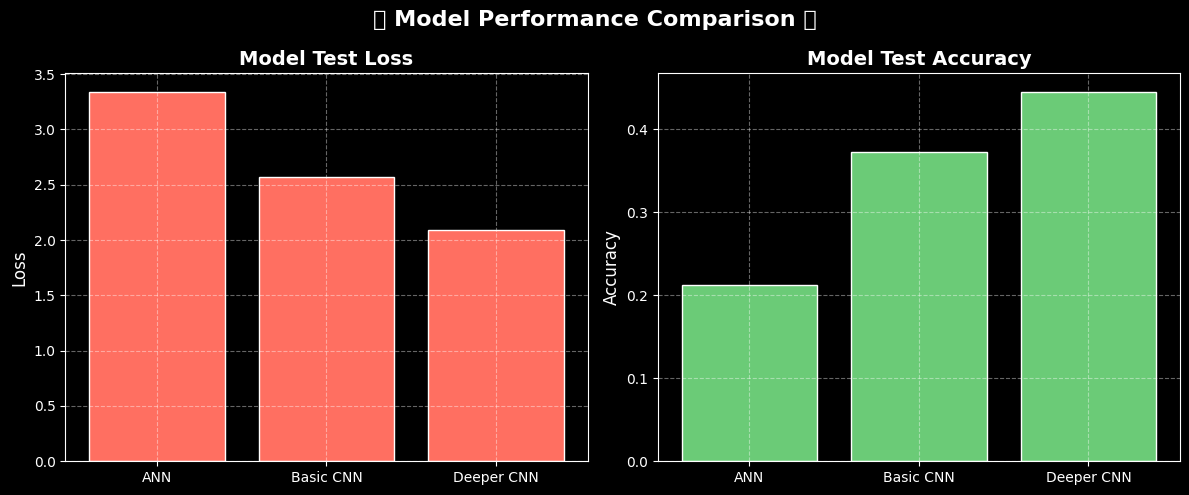

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(cifar100_test_images, test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(cifar100_test_images, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(cifar100_test_images, test_labels_one_hot, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


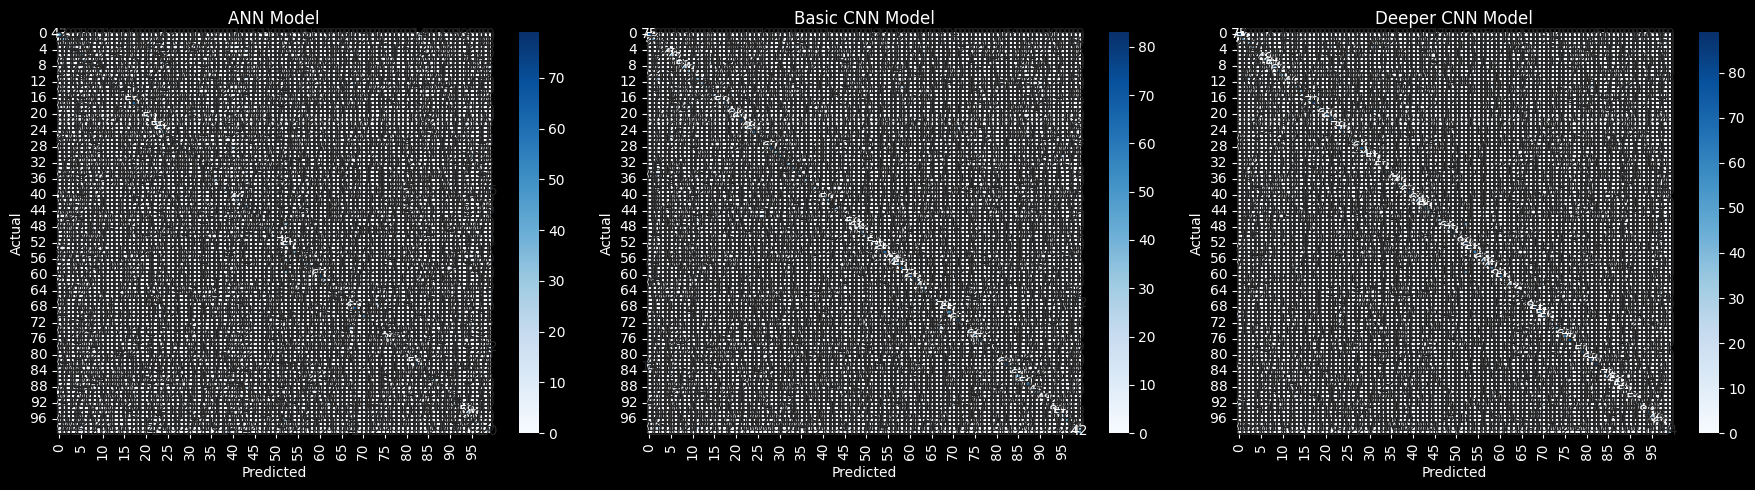

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(cifar100_test_images)
basic_cnn_predictions = basic_cnn_model.predict(cifar100_test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(cifar100_test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()


Analyzing Predictions from the Deeper CNN Model
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step

Found 4451 correct predictions.
Found 5549 incorrect predictions.


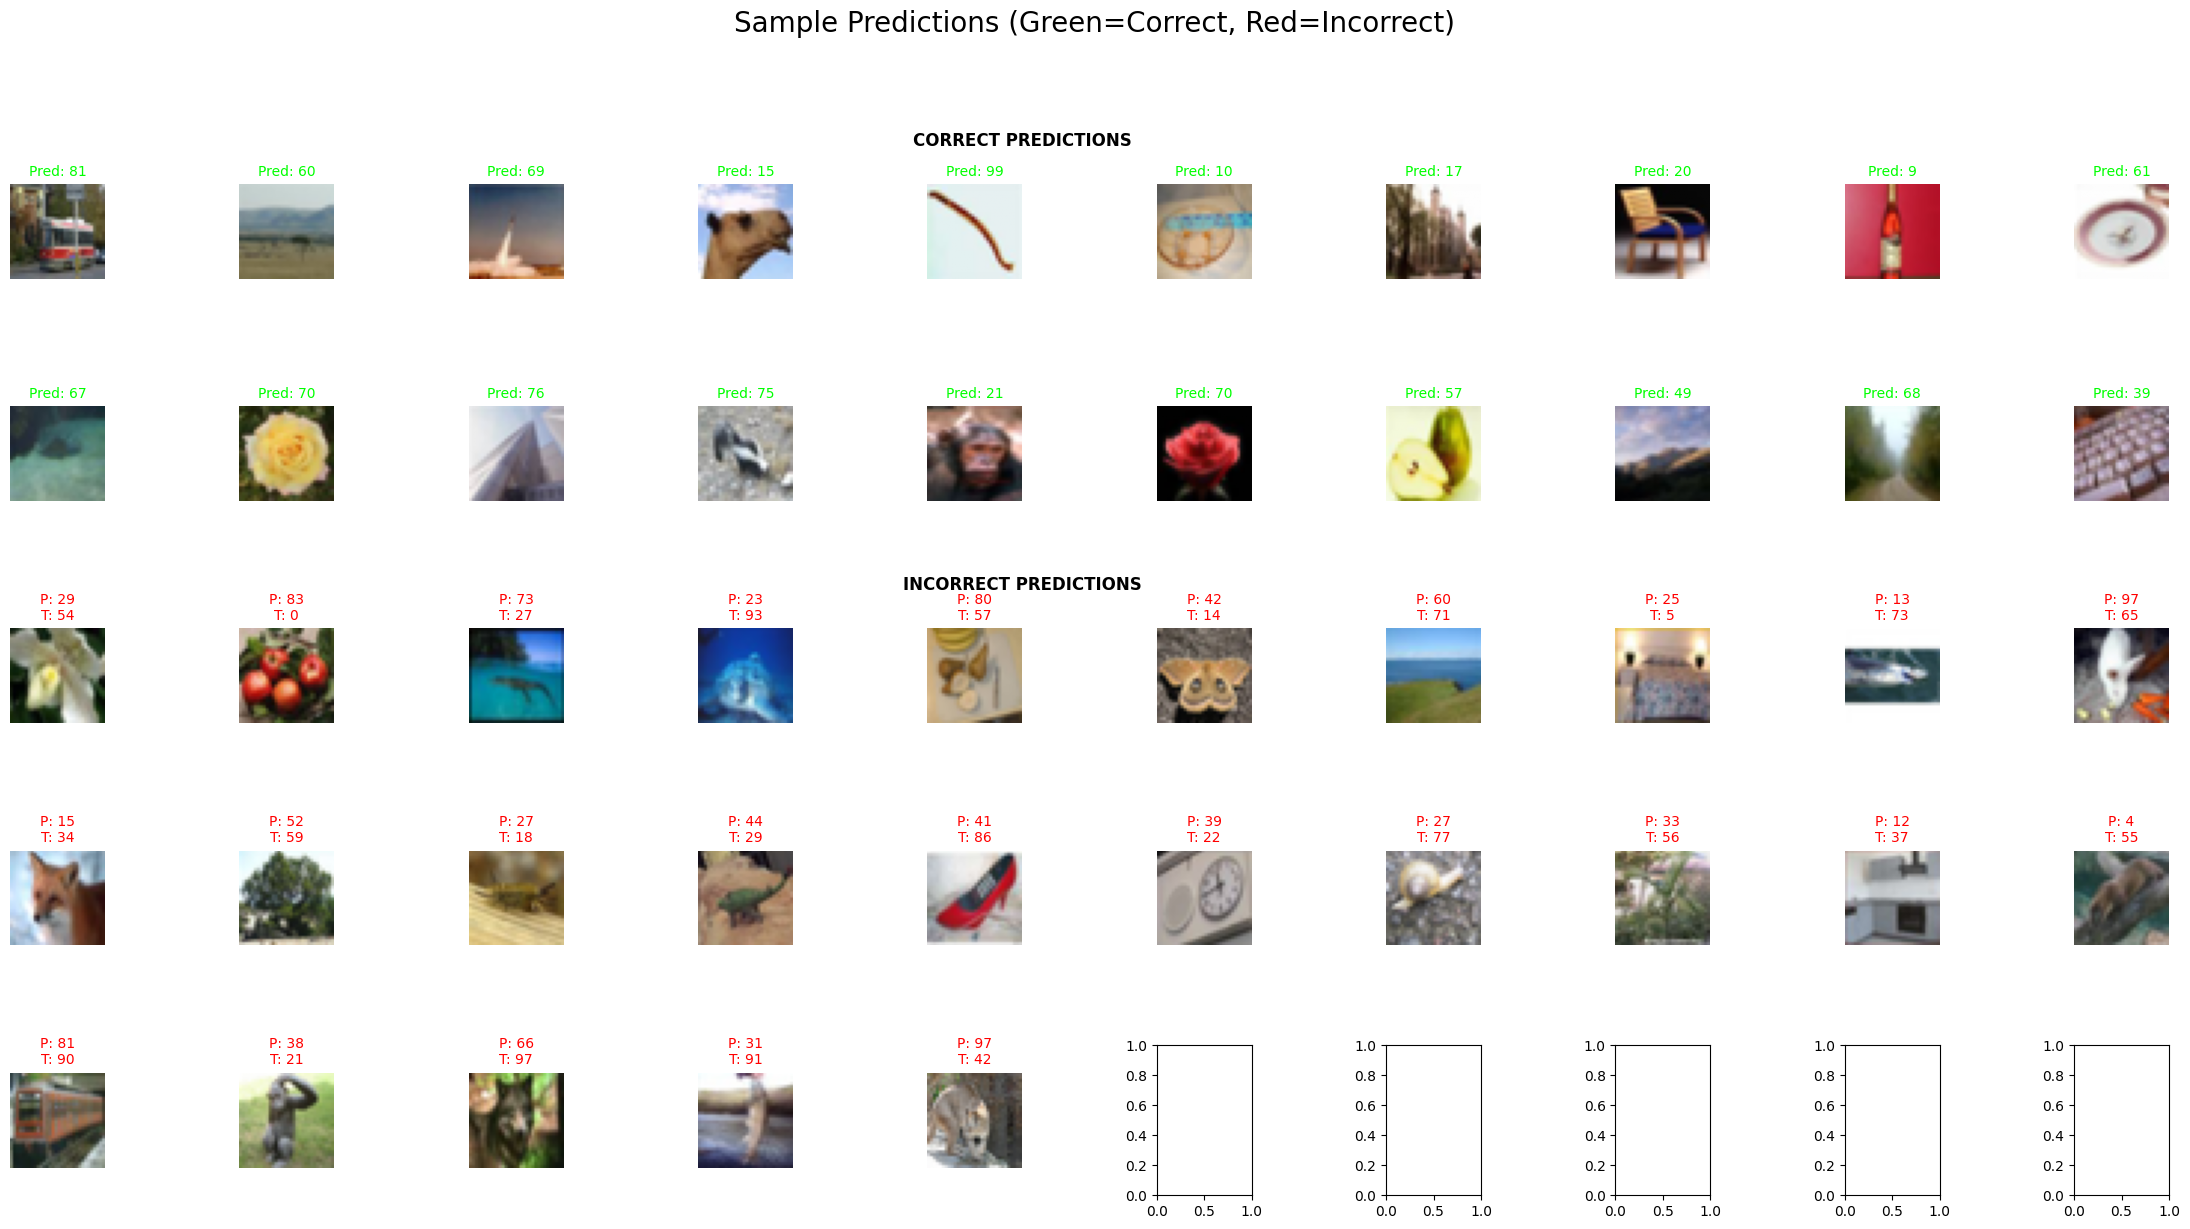

In [23]:
import numpy as np
import matplotlib.pyplot as plt

print("\nAnalyzing Predictions from the Deeper CNN Model")

# Make predictions (if not already done earlier)
predictions = deeper_cnn_model.predict(cifar100_test_images)
y_pred_deeper_cnn = np.argmax(predictions, axis=1)

# Use original integer labels
y_true_c100 = cifar100_test_labels.flatten()

# Find correct and incorrect indices
correct_indices = np.where(y_pred_deeper_cnn == y_true_c100)[0]
incorrect_indices = np.where(y_pred_deeper_cnn != y_true_c100)[0]

print(f"\nFound {len(correct_indices)} correct predictions.")
print(f"Found {len(incorrect_indices)} incorrect predictions.")

# Create grid: 5 rows × 10 cols (25 correct + 25 incorrect = 50 images)
fig, axes = plt.subplots(5, 10, figsize=(22, 12))
fig.suptitle("Sample Predictions (Green=Correct, Red=Incorrect)", fontsize=20, y=1.02)

# --- Display 25 Correct Predictions ---
for i, idx in enumerate(np.random.choice(correct_indices, 25, replace=False)):
    row = i // 10
    col = i % 10
    ax = axes[row, col]
    ax.imshow(cifar100_test_images[idx])
    ax.set_title(f"Pred: {y_pred_deeper_cnn[idx]}", color="lime", fontsize=10)
    ax.axis("off")

# --- Display 25 Incorrect Predictions ---
for i, idx in enumerate(np.random.choice(incorrect_indices, 25, replace=False)):
    row = (i // 10) + 2  # Incorrect start from 3rd row
    col = i % 10
    ax = axes[row, col]
    ax.imshow(cifar100_test_images[idx])
    ax.set_title(f"P: {y_pred_deeper_cnn[idx]}\nT: {y_true_c100[idx]}", color="red", fontsize=10)
    ax.axis("off")

# Add labels
axes[0, 4].text(1.0, 1.4, 'CORRECT PREDICTIONS', transform=axes[0, 4].transAxes,
                fontsize=12, weight='bold', ha='center')

axes[2, 4].text(1.0, 1.4, 'INCORRECT PREDICTIONS', transform=axes[2, 4].transAxes,
                fontsize=12, weight='bold', ha='center')

plt.tight_layout()
plt.show()

4451 correct predictions (44.51%) and 5549 incorrect predictions (55.49%).

## Conclusion:

The results indicate that the model classifies less than half of the test images correctly. While the 44.51% accuracy shows that it has learned to recognize certain features and patterns, the 55.49% misclassification rate highlights substantial room for improvement. The imbalance between correct and incorrect predictions suggests that the model struggles with distinguishing between multiple classes, making it necessary to refine the architecture, improve data preprocessing, or apply techniques like augmentation and regularization to boost performance.
